#効果測定（分類）
##柏校　古田　精一

#0.環境の準備
まずは環境の準備をします。<br />
図表を描画する際に日本語フォントを使用できるよう、追加のパッケージをインストールします。<br />
また、定番で使用する各種のモジュールも、最初に宣言しておきます。

In [52]:
!pip install japanize-matplotlib

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import japanize_matplotlib
%matplotlib inline

#1.データの準備
##1-1.データの読み込み
まずは使用するデータを読み込みます。<br />

In [54]:
df = pd.read_csv('digits.csv') #, header=0, encoding='cp932')
df = df.drop(columns='Unnamed: 0')
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


どのような画像が使用されているのか、可視化してみます<br />
mnistに比べると、粗い画像のようです。<br />

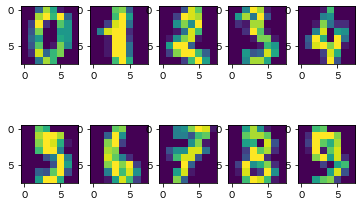

In [55]:
Y = df['target']
X = df.drop(columns='target')
valueX = X.values
valueX = valueX.reshape(len(valueX), 8,8) / 255
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 4)
for item in range(2*5):
  plt.subplot(2, 5, item+1)
  plt.imshow(valueX[item])
plt.show()

欠損値はなさそうです。<br />

In [56]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

#1.ロジスティック回帰

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new = sc.fit_transform(X)
x_train, x_val, y_train,y_val = train_test_split(new, Y, test_size = 0.2, random_state = 0)

In [58]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, C = 0.1, multi_class = 'auto', solver = 'lbfgs')

In [59]:
model.fit(x_train, y_train)
print( model.score(x_train, y_train) )
model.score(x_val, y_val)

0.988865692414753


0.9638888888888889

#2.ランダムフォレスト

In [60]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier( n_estimators = 200, random_state  =0)

In [61]:
model2.fit(x_train, y_train)
print( model2.score(x_train, y_train) )
model2.score(x_val, y_val)

1.0


0.9694444444444444

#3.アダブースト

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier(random_state = 0, max_depth = 5)
model3 = AdaBoostClassifier(n_estimators=500, random_state=0, base_estimator=base_model)

In [63]:
model3.fit(x_train, y_train)
print( model3.score(x_train, y_train) )
model3.score(x_val, y_val)

1.0


0.9638888888888889

#おまけ.ニューラルネットワーク

In [64]:
from tensorflow.keras import layers, models, optimizers
hidden = layers.Dense(units=100, activation="sigmoid", use_bias=False, input_dim=64)
output = layers.Dense(units=10, activation="softmax", use_bias=False)
sgd = optimizers.SGD(learning_rate=0.1)
model = models.Sequential()
model.add(hidden)
model.add(output)
model.compile(sgd, loss="mse", metrics="acc")
valueX = X.values
valueX = valueX.reshape(len(valueX), 8*8)
valueY = Y.values
valueY = np.eye(10)[valueY]
x_train, x_val, y_train, y_val = train_test_split(valueX, valueY, test_size = 0.2, random_state = 0)
history = model.fit(x_train, y_train, epochs=100, verbose=0)

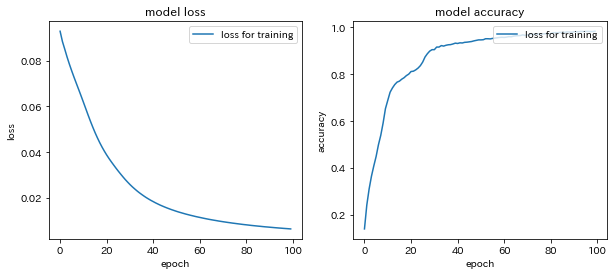

In [65]:
from matplotlib import pyplot
fig, (axL, axR) = pyplot.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(history)
plot_history_acc(history)

In [66]:
score = model.evaluate(x_val, y_val, verbose=0)
score[0], score[1]

(0.008889925666153431, 0.9666666388511658)